# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data_6.csv` file you exported from Assignment 6. (Note: If you had significant errors with assignment 6, you can use the file named "airbnb_listings.csv" in the DataSets folder on GitHub as a backup starting point.)

### Do the following:
In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [3]:
# Add code here 🔧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_airbnb_data_6.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7535 non-null   int64  
 1   listing_url                                   7535 non-null   object 
 2   scrape_id                                     7535 non-null   int64  
 3   last_scraped                                  7535 non-null   object 
 4   source                                        7535 non-null   object 
 5   name                                          7535 non-null   object 
 6   description                                   7445 non-null   object 
 7   neighborhood_overview                         4168 non-null   object 
 8   picture_url                                   7535 non-null   object 
 9   host_id                                       7535 non-null   i

## 2. Check for Skew in a Numeric Column

### Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

### Do the following:
Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare

### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



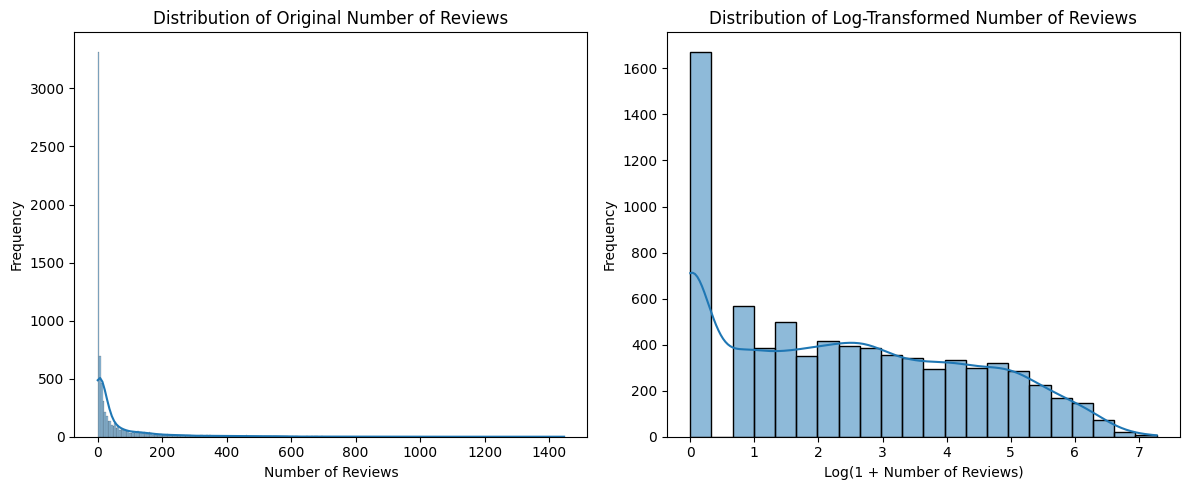

Histograms for original and log-transformed 'number_of_reviews' have been generated.


In [5]:
# Plot a histogram of the 'number_of_reviews' column
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['number_of_reviews'], kde=True)
plt.title('Distribution of Original Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

# Apply a log transformation to the 'number_of_reviews' column
df['number_of_reviews_log'] = np.log1p(df['number_of_reviews'])

# Plot a histogram of the newly created 'number_of_reviews_log' column
plt.subplot(1, 2, 2)
sns.histplot(df['number_of_reviews_log'], kde=True)
plt.title('Distribution of Log-Transformed Number of Reviews')
plt.xlabel('Log(1 + Number of Reviews)')
plt.ylabel('Frequency')

# 4. Display both plots
plt.tight_layout()
plt.show()

print("Histograms for original and log-transformed 'number_of_reviews' have been generated.")

### ✍️ Your Response: 🔧
1. I examined the number_of_reviews column.

2. I used a log transformation (specifically np.log1p) because the original distribution of number_of_reviews was highly skewed to the right, with many listings having few reviews and a long tail of listings with many reviews. The log transformation helps to compress the range of values, making the distribution more symmetrical and closer to a normal distribution, which is often preferred for statistical analysis and modeling.

3. The transformed version makes the data more usable by reducing skewness and making the distribution more interpretable. For analysis, this can improve the performance of models that assume normally distributed data. For stakeholders, it provides a clearer picture of the general distribution of reviews, allowing them to better understand segments like 'few reviews' versus 'many reviews' without being misled by extreme outliers. For instance, an analyst can more easily segment listings into review volume tiers or compare review performance across different listing types.

## 3. Scale Two Numeric Columns

### Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

### Do the following:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scale 'accommodates' column
min_max_scaler = MinMaxScaler()
df['accommodates_minmax_scaled'] = min_max_scaler.fit_transform(df[['accommodates']])

# Z-score scale 'beds' column
standard_scaler = StandardScaler()
df['beds_zscore_scaled'] = standard_scaler.fit_transform(df[['beds']])

display(df[['accommodates', 'accommodates_minmax_scaled', 'beds', 'beds_zscore_scaled']].head())

,accommodates,accommodates_minmax_scaled,beds,beds_zscore_scaled
0,3,0.133333,2.0,0.343911
1,4,0.200000,2.0,0.343911
2,1,0.000000,1.0,-0.531552
3,2,0.066667,1.0,-0.531552
4,2,0.066667,1.0,-0.531552


### ✍️ Your Response: 🔧
1. I scaled the accomodates and beds columns using the Min-Max scale and Z-score, respectfully.

2. These scaled values might be more useful than the originals when we need to be able to see what the majority of data comes from without getting distracted by outliers or extra data that deters our attention away from the original problem.

3. Airbnb might benefit by being able to see how these values are impacting their sales and to compare what consumers look for the most in booking a place in order to get better business and publicize the more favorable stays.

## 4. Group a Numeric Column into Categories

### Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

### Do the following:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [ ]:
# Add code here 🔧

### ✍️ Your Response: 🔧
1.

2.

3.

## 5. Create Two New Business-Relevant Variables

### Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

### Do the following:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [ ]:
# Add code here 🔧

### ✍️ Your Response: 🔧 🔧
1.

2.

3.



## 6. Encode a Categorical Column

### Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

### Do the following:
- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [ ]:
# Add code here 🔧

### ✍️ Your Response: 🔧
1.
2.
3.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 11**, where you'll use the data in a regression model.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_7.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```

In [ ]:
# export csv here 🔧

## 8. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1.

2.

3.
4.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_07_data_transformation.ipynb"